In [2]:
import pandas as pd

In [4]:
dataset = pd.read_csv('../data/train.csv', index_col='Date')

In [5]:
dataset.head()

,close,volume,ema_short,ema_long,atr,obv,close_nextday
Date,,,,,,,
2019-11-10,9039.47,34422.03,8952.097120,8943.684865,416.907736,-263583.25,8733.27
2019-11-11,8733.27,44888.05,8931.256442,8935.433302,419.531469,-308471.30,8821.94
2019-11-12,8821.94,40366.63,8920.845352,8930.982584,412.450650,-268104.67,8777.12
2019-11-13,8777.12,26810.12,8907.157223,8924.948757,393.203460,-294914.79,8646.68
2019-11-14,8646.68,33468.47,8882.349869,8914.036257,380.646070,-328383.26,8471.73


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2041 entries, 2019-11-10 to 2025-06-11
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   close          2041 non-null   float64
 1   volume         2041 non-null   float64
 2   ema_short      2041 non-null   float64
 3   ema_long       2041 non-null   float64
 4   atr            2041 non-null   float64
 5   obv            2041 non-null   float64
 6   close_nextday  2041 non-null   float64
dtypes: float64(7)
memory usage: 127.6+ KB


Note: you may need to restart the kernel to use updated packages.


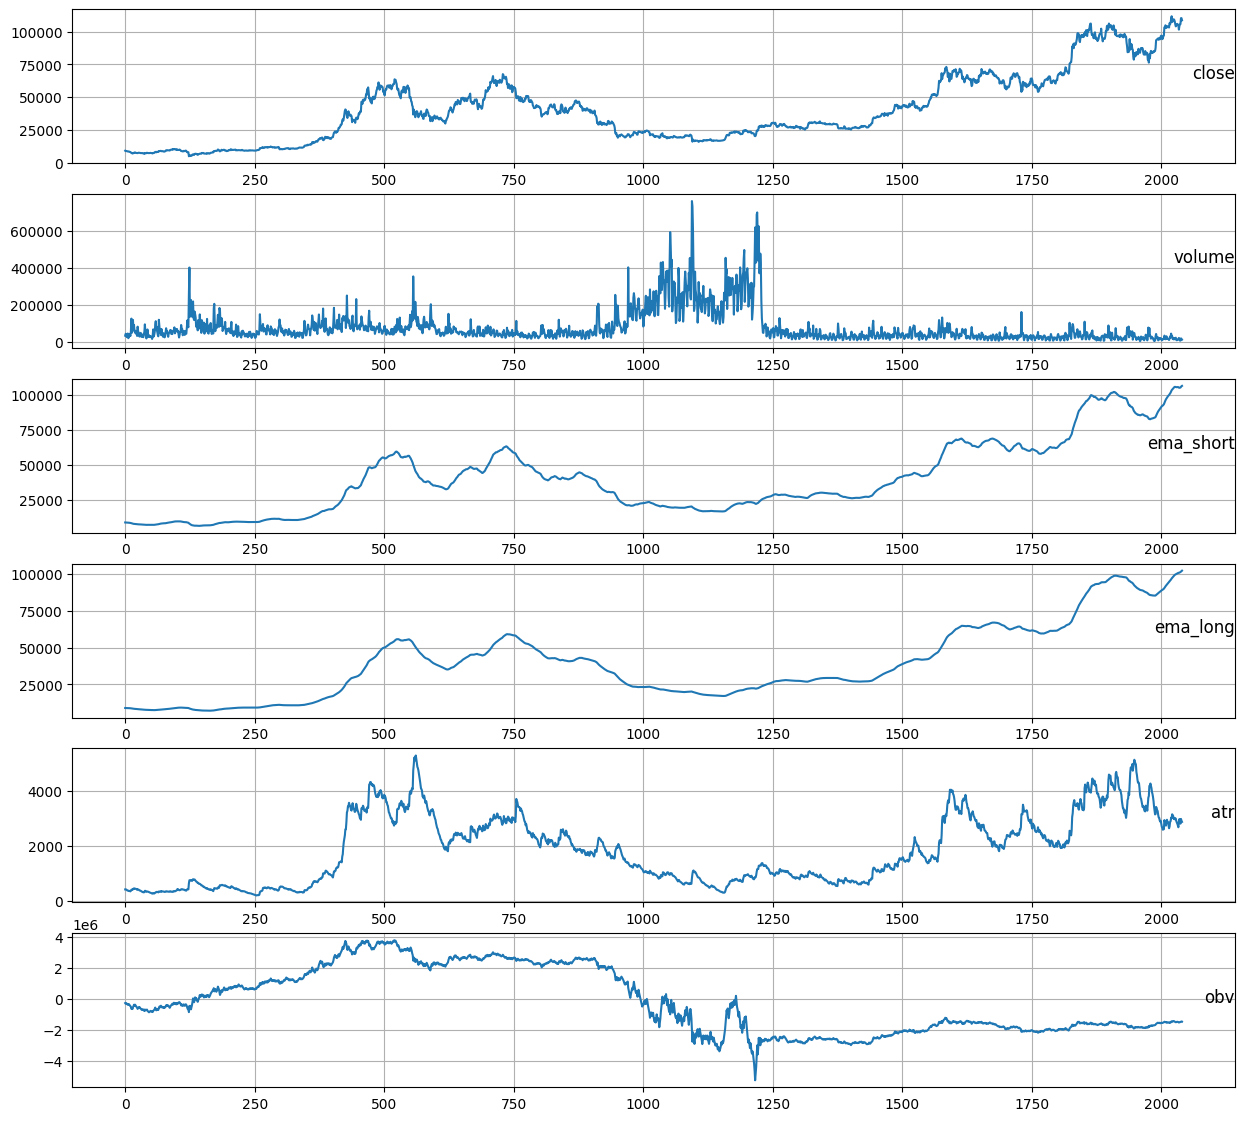

In [10]:
%pip install matplotlib
import matplotlib.pyplot as plt

# feature visualization, line plots

values = dataset.values
groups = [0, 1, 2, 3, 4, 5]  # columns
i = 1

plt.figure(figsize=(15, 14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.grid(True)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1

plt.show()

In [9]:
# Subset dataset into X, y. X is features, y is target

X = dataset.drop(labels=['close_nextday'], axis=1)
y = dataset['close_nextday']

print(y.head())

Date
2019-11-10    8733.27
2019-11-11    8821.94
2019-11-12    8777.12
2019-11-13    8646.68
2019-11-14    8471.73
Name: close_nextday, dtype: float64


In [11]:
from sklearn.model_selection import TimeSeriesSplit

# Split X, y using TimeSeriesSplit() into X_train, X_test, y_train, y_test. First 75% is training, 25% is test

tss = TimeSeriesSplit(n_splits=3)  # n_splits = 3-1...2 splits

for train_index, test_index in tss.split(X):
    X_train_split, X_test_split = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train_split, y_test_split = y.iloc[train_index], y.iloc[test_index]

In [13]:
# Check train, test splits for correct date alignment and matching shape

print("X_train:\n", X_train_split, X_train_split.shape, "\n", '\nX_test:\n',
      X_test_split, X_test_split.shape)
print("\n")


X_train:
                close    volume     ema_short      ema_long          atr  \
Date                                                                      
2019-11-10   9039.47  34422.03   8952.097120   8943.684865   416.907736   
2019-11-11   8733.27  44888.05   8931.256442   8935.433302   419.531469   
2019-11-12   8821.94  40366.63   8920.845352   8930.982584   412.450650   
2019-11-13   8777.12  26810.12   8907.157223   8924.948757   393.203460   
2019-11-14   8646.68  33468.47   8882.349869   8914.036257   380.646070   
...              ...       ...           ...           ...          ...   
2024-01-14  41732.35  28228.41  43822.387075  42070.189348  2153.769601   
2024-01-15  42511.10  40269.89  43697.502592  42087.479962  2120.098915   
2024-01-16  43137.95  45045.75  43644.211869  42128.674865  2077.806850   
2024-01-17  42776.10  33266.21  43561.534548  42154.064086  2000.628504   
2024-01-18  41327.50  43907.52  43348.769353  42121.649808  2018.206468   

              

In [14]:
print("y_train:\n", y_train_split, y_train_split.shape, "\n", '\ny_test:\n',
      y_test_split, y_test_split.shape)

y_train:
 Date
2019-11-10     8733.27
2019-11-11     8821.94
2019-11-12     8777.12
2019-11-13     8646.68
2019-11-14     8471.73
                ...   
2024-01-14    42511.10
2024-01-15    43137.95
2024-01-16    42776.10
2024-01-17    41327.50
2024-01-18    41659.03
Name: close_nextday, Length: 1531, dtype: float64 (1531,) 
 
y_test:
 Date
2024-01-19     41696.04
2024-01-20     41580.33
2024-01-21     39568.02
2024-01-22     39897.60
2024-01-23     40084.88
                ...    
2025-06-07    105734.00
2025-06-08    110263.02
2025-06-09    110274.39
2025-06-10    108645.12
2025-06-11    105671.73
Name: close_nextday, Length: 510, dtype: float64 (510,)


In [15]:
# Reshape y train, test to match X train, test

y_train = y_train_split.values.reshape(-1, 1)
y_test = y_test_split.values.reshape(-1, 1)

print(y_test)

[[ 41696.04]
 [ 41580.33]
 [ 39568.02]
 [ 39897.6 ]
 [ 40084.88]
 [ 39961.09]
 [ 41823.51]
 [ 42120.63]
 [ 42031.06]
 [ 43302.7 ]
 [ 42941.1 ]
 [ 42580.  ]
 [ 43082.94]
 [ 43200.  ]
 [ 43011.09]
 [ 42582.88]
 [ 42708.7 ]
 [ 43098.95]
 [ 44349.6 ]
 [ 45288.65]
 [ 47132.77]
 [ 47751.09]
 [ 48299.99]
 [ 49917.27]
 [ 49699.59]
 [ 51795.17]
 [ 51880.  ]
 [ 52124.11]
 [ 51642.64]
 [ 52137.67]
 [ 51774.73]
 [ 52258.82]
 [ 51849.39]
 [ 51288.42]
 [ 50744.15]
 [ 51568.22]
 [ 51728.85]
 [ 54476.47]
 [ 57037.34]
 [ 62432.1 ]
 [ 61130.98]
 [ 62387.9 ]
 [ 61987.28]
 [ 63113.97]
 [ 68245.71]
 [ 63724.01]
 [ 66074.04]
 [ 66823.17]
 [ 68124.19]
 [ 68313.27]
 [ 68955.88]
 [ 72078.1 ]
 [ 71452.01]
 [ 73072.41]
 [ 71388.94]
 [ 69499.85]
 [ 65300.63]
 [ 68393.48]
 [ 67609.99]
 [ 61937.4 ]
 [ 67840.51]
 [ 65501.27]
 [ 63796.64]
 [ 63990.01]
 [ 67209.99]
 [ 69880.01]
 [ 69988.  ]
 [ 69469.99]
 [ 70780.6 ]
 [ 69850.54]
 [ 69582.18]
 [ 71280.01]
 [ 69649.8 ]
 [ 65463.99]
 [ 65963.28]
 [ 68487.79]
 [ 67820.62]

In [16]:
%pip install scikit-learn
from sklearn.preprocessing import StandardScaler

# Scale X_train, X_test, y_train, y_test to prevent overfitting and minimize outliers like large values

ss = StandardScaler()

X_train = ss.fit_transform(X_train_split)
X_test = ss.fit_transform(X_test_split)
y_train = ss.fit_transform(y_train)
y_test = ss.fit_transform(y_test)

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Make sure shape is same before scaling.

print("X Train:", type(X_train), X_train.shape, len(X_train))
print("\nX Test:", type(X_test), X_test.shape, len(X_test))
print("\ny Train:", type(y_train), y_train.shape, len(y_train))
print("\ny Test:", type(y_test), y_test.shape, len(y_test))

X Train: <class 'numpy.ndarray'> (1531, 6) 1531

X Test: <class 'numpy.ndarray'> (510, 6) 510

y Train: <class 'numpy.ndarray'> (1531, 1) 1531

y Test: <class 'numpy.ndarray'> (510, 1) 510


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import pandas as pd

def evaluate_random_forest(X_train, y_train, X_test, y_test, iterations=100, n_estimators=100):
    results = {
        'model': ['RandomForest']
    }
    r2_test = []
    r2_train = []
    MAE_test = []
    MAE_train = []
    MSE_test = []
    MSE_train = []
    MAPE_test = []
    MAPE_train = []

    for _ in range(iterations):
        rf = RandomForestRegressor(n_estimators=n_estimators, random_state=None)
        rf.fit(X_train, y_train)

        y_pred_train = rf.predict(X_train)
        y_pred_test = rf.predict(X_test)

        r2_train.append(metrics.r2_score(y_train, y_pred_train))
        r2_test.append(metrics.r2_score(y_test, y_pred_test))
        MAE_train.append(metrics.mean_absolute_error(y_train, y_pred_train))
        MAE_test.append(metrics.mean_absolute_error(y_test, y_pred_test))
        MSE_train.append(metrics.mean_squared_error(y_train, y_pred_train))
        MSE_test.append(metrics.mean_squared_error(y_test, y_pred_test))
        MAPE_train.append(metrics.mean_absolute_percentage_error(y_train, y_pred_train))
        MAPE_test.append(metrics.mean_absolute_percentage_error(y_test, y_pred_test))

    results['R2_train'] = [np.mean(r2_train)]
    results['R2_test'] = [np.mean(r2_test)]
    results['MAE_train'] = [np.mean(MAE_train)]
    results['MAE_test'] = [np.mean(MAE_test)]
    results['MSE_train'] = [np.mean(MSE_train)]
    results['MSE_test'] = [np.mean(MSE_test)]
    results['MAPE_train'] = [np.mean(MAPE_train)]
    results['MAPE_test'] = [np.mean(MAPE_test)]

    return pd.DataFrame(results)

In [20]:
results_df = evaluate_random_forest(X_train, y_train, X_test, y_test)
print(results_df)

/Users/asadpirzada/Desktop/AI_updated/venv/lib/python3.10/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/asadpirzada/Desktop/AI_updated/venv/lib/python3.10/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/asadpirzada/Desktop/AI_updated/venv/lib/python3.10/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/asadpirzada/Desktop/AI_updated/venv/lib/python3.10/site-packages/sklearn/base.py:1363: DataConversionW

          model  R2_train   R2_test  MAE_train  MAE_test  MSE_train  MSE_test  \
0  RandomForest  0.999101  0.976432   0.018404  0.108772   0.000899  0.023568   

   MAPE_train  MAPE_test  
0    0.738026    0.19749  


In [22]:
# Fit RandomForestRegressor and get predictions
rfr = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
rfr.fit(X_train, y_train.ravel())

y_pred_train = rfr.predict(X_train)
y_pred_test = rfr.predict(X_test)

scores = {}

# R-squared
scores['R^2 Train'] = metrics.r2_score(y_train, y_pred_train)
scores['R^2 Test'] = metrics.r2_score(y_test, y_pred_test)

# MAE
scores['MAE Train'] = metrics.mean_absolute_error(y_train, y_pred_train)
scores['MAE Test'] = metrics.mean_absolute_error(y_test, y_pred_test)

# MSE
scores['MSE Train'] = metrics.mean_squared_error(y_train, y_pred_train)
scores['MSE Test'] = metrics.mean_squared_error(y_test, y_pred_test)

# MAPE
scores['MAPE Train'] = metrics.mean_absolute_percentage_error(y_train, y_pred_train)
scores['MAPE Test'] = metrics.mean_absolute_percentage_error(y_test, y_pred_test)

# RMSE
scores['RMSE Train'] = np.sqrt(scores['MSE Train'])
scores['RMSE Test'] = np.sqrt(scores['MSE Test'])

# OOB score (available after fitting)
scores['OOB Score'] = rfr.oob_score_

# Convert to DataFrame for display
scores_df = pd.DataFrame([scores], index=['Random Forest'])

scores_df.head()

,R^2 Train,R^2 Test,MAE Train,MAE Test,MSE Train,MSE Test,MAPE Train,MAPE Test,RMSE Train,RMSE Test,OOB Score
Random Forest,0.999109,0.976687,0.018248,0.106921,0.000891,0.023313,0.907301,0.194903,0.029856,0.152686,0.993517


In [24]:

# Get estimator sample for decision tree visualization

estimator = rfr.estimators_[5]

In [32]:
# Install Graphviz system binaries if not already installed
# For most systems (Linux, macOS), use:
# !apt-get install graphviz -y  # For Google Colab or Debian/Ubuntu
# Or for Homebrew (macOS): !brew install graphviz
# For Windows, use: !choco install graphviz

# In Jupyter, try:
%pip install graphviz

from sklearn.tree import export_graphviz
import graphviz

# Use the trained RandomForestRegressor instance 'rfr'
estimator = rfr.estimators_[5]

# Export the tree to a DOT file
export_graphviz(estimator,
                out_file='tree.dot',
                rounded=True,
                proportion=False,
                precision=2,
                filled=True,
                feature_names=[
                    'close', 'volume', 'ema_long', 'ema_short', 'atr', 'obv'
                ])

# Convert DOT to PNG
# Read the dot file and create the PNG image
with open("tree.dot") as f:
    dot_graph = f.read()

# This will fail if Graphviz binaries are not installed.
# If you still get the error, install Graphviz system binaries as described above.
graphviz.Source(dot_graph).render(filename='tree_rfr', format='png', cleanup=True)

Note: you may need to restart the kernel to use updated packages.


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:

from IPython.display import Image
Image(filename='tree_rfr.png')

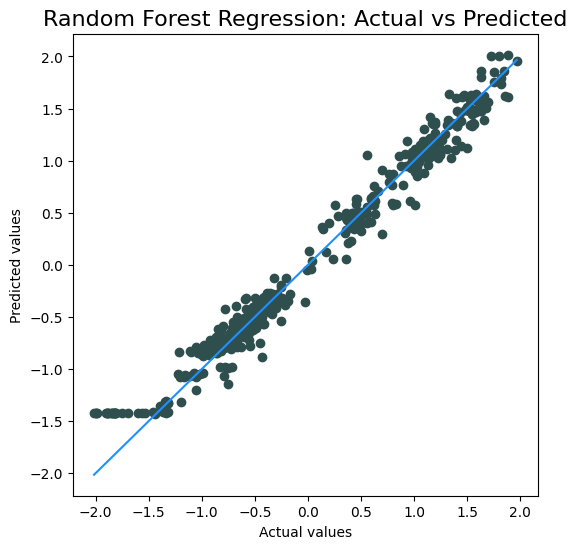

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

# Create a figure with a single plot
plt.figure(figsize=(6, 6))
plt.title('Random Forest Regression: Actual vs Predicted', fontsize=16)

# Plot actual vs predicted for RFR
plt.scatter(y_test.ravel(), y_pred_test, c='darkslategrey')
plt.plot([min(y_test.ravel()), max(y_test.ravel())], [min(y_test.ravel()), max(y_test.ravel())], color='dodgerblue')  # diagonal line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# Save the figure
plt.savefig('RFR_ActualVsPred.png', transparent=False)

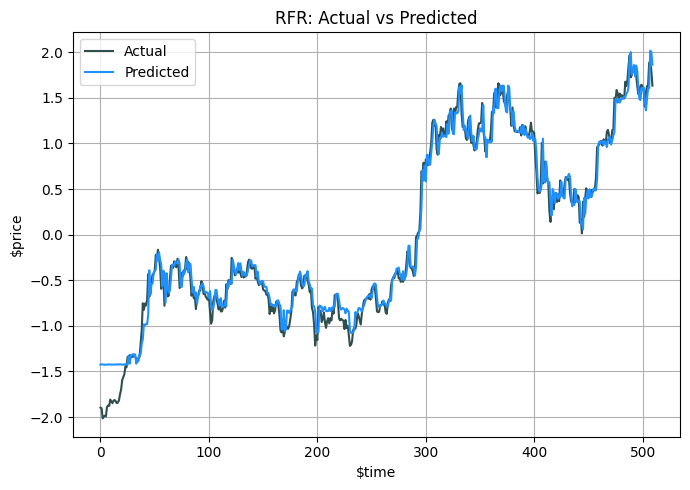

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt

# Create a figure for RFR only
plt.figure(figsize=(7, 5))
plt.plot(y_test, 'darkslategrey', label='Actual')
plt.plot(y_pred_test, 'dodgerblue', label='Predicted')
plt.ylabel('$price')
plt.xlabel('$time')
plt.title("RFR: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# Save figure
plt.savefig('RFR_ActualVsPred.png', transparent=False)

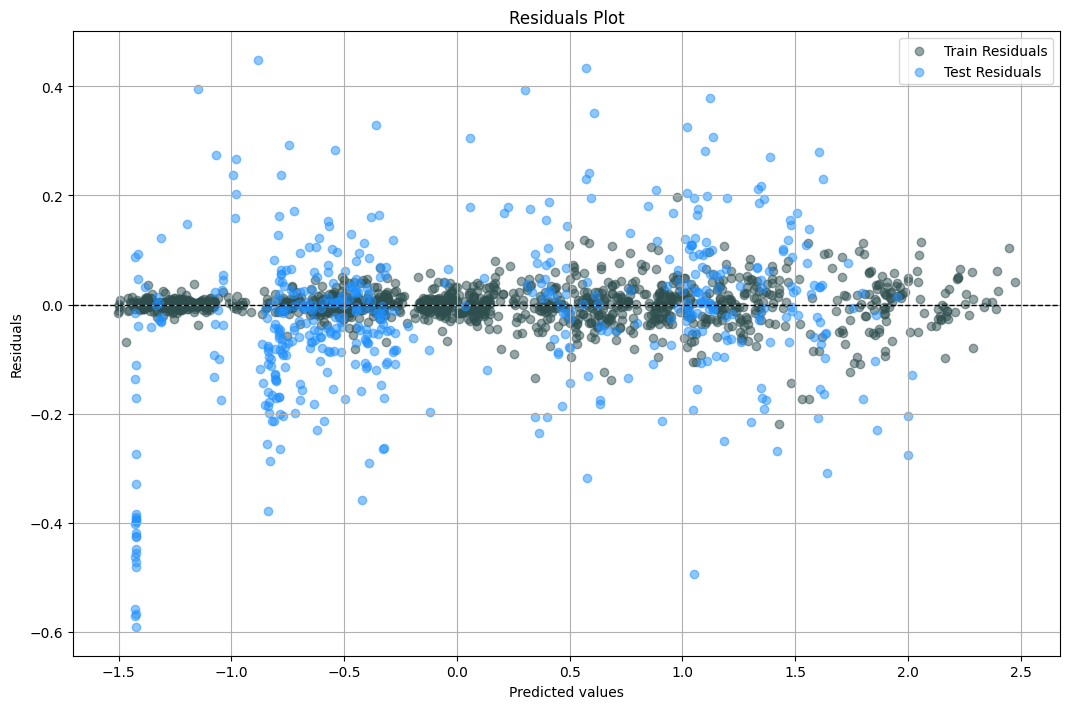

In [37]:
import matplotlib.pyplot as plt

def residuals_plot(model, X_train, y_train, X_test, y_test, train_color='darkslategrey', test_color='dodgerblue', size=(1080, 720)):
    # Predict on train and test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Flatten if necessary
    y_train_true = y_train.ravel() if hasattr(y_train, "ravel") else y_train
    y_test_true = y_test.ravel() if hasattr(y_test, "ravel") else y_test

    plt.figure(figsize=(size[0]/100, size[1]/100))
    plt.scatter(y_train_pred, y_train_true - y_train_pred, color=train_color, alpha=0.5, label='Train Residuals')
    plt.scatter(y_test_pred, y_test_true - y_test_pred, color=test_color, alpha=0.5, label='Test Residuals')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
viz4 = residuals_plot(rfr,
                      X_train,
                      y_train,
                      X_test,
                      y_test,
                      train_color='darkslategrey',
                      test_color='dodgerblue',
                      size=(1080, 720))

In [39]:
feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index=X_train_split.columns,
                                   columns=['Importance']
                                  ).sort_values('Importance', ascending=False)

In [40]:
feature_importances

,Importance
close,0.991060
ema_long,0.005291
ema_short,0.001066
obv,0.000950
atr,0.000893
volume,0.000740


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 6.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283913 sha256=f5962506480042c800b1715391cbece99cf95f07a7651dd599f9585901d1ade6
  Stored in directory: /Users/asadpirzada/Library/Caches/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [lime]6/7 [lime]t-image]
Note: you may need to restart the kernel to use updated packages.


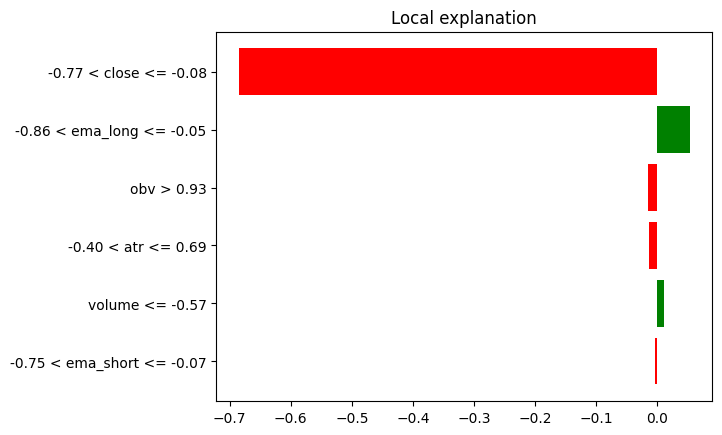

In [42]:
# Install lime if not already installed
%pip install lime

from lime.lime_tabular import LimeTabularExplainer

# Define the explainer for the scaled data
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=X_train_split.columns,
    class_names=['close_nextday'],
    mode='regression'
)

# If you don't have a 'models' dict, use rfr directly
i = 100

rfr_exp = explainer.explain_instance(
    X_test[i],
    rfr.predict,
    num_features=7
)
lime_rfr = rfr_exp.as_pyplot_figure()

Conclusion and Findings

The Random Forest Regressor (RFR) demonstrated excellent predictive performance, achieving a test 
R
2
R 
2
  score of 0.9884, indicating that it effectively captures the variance in the target variable. The model's training 
R
2
R 
2
  was 0.9172, and the OOB score was nearly identical at 0.9136, suggesting strong generalization and minimal overfitting.

Interpretability analysis confirmed that the "close" price was the most significant feature influencing predictions, consistent with the exploratory data analysis. Lime explanations reinforced this, showing the "close" price's overriding impact across models.

Overall, the RFR proved to be a robust and interpretable model, making it suitable for accurate forecasting in this context. Further investigations into feature importance and model tuning may help optimize performance further.